# BDAT 1004 – Data Programming [Problem Set 3]

## Question 1

In [1]:
#importing libraries
import pandas as pd

In [2]:
#import dataset from given link
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",delimiter="|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
#removing unwanted columns
users = users[['age','gender','occupation']]
users

,age,gender,occupation
0,24,M,technician
1,53,F,other
2,23,M,writer
3,24,M,technician
4,33,F,other
...,...,...,...
938,26,F,student
939,32,M,administrator
940,20,M,student
941,48,F,librarian


#### mean age per occupation

In [4]:
#reset index and round off numbers
mean_age_per_occupation = users.groupby('occupation').mean().reset_index().round(2)

#rename columns
mean_age_per_occupation.columns = ['occupation', 'mean_age']

mean_age_per_occupation

,occupation,mean_age
0,administrator,38.75
1,artist,31.39
2,doctor,43.57
3,educator,42.01
4,engineer,36.39
5,entertainment,29.22
6,executive,38.72
7,healthcare,41.56
8,homemaker,32.57
9,lawyer,36.75


#### male ratio per occupation

In [5]:
df = pd.pivot_table(users, values='gender', index='occupation', columns='gender',aggfunc='count',fill_value=0).reset_index().rename_axis(None, axis=1)
# https://stackoverflow.com/questions/44513488/how-to-remove-multilevel-index-in-pandas-pivot-table

In [6]:
#calculating male ratio
df['male_ratio'] = df['M']/(df['F']+df['M'])

In [7]:
# selecting required columns
df = df[['occupation','male_ratio']]
df.sort_values('male_ratio',ascending=False).round(2).reset_index(drop=True)

,occupation,male_ratio
0,doctor,1.00
1,engineer,0.97
2,technician,0.96
3,retired,0.93
4,programmer,0.91
5,executive,0.91
6,scientist,0.90
7,entertainment,0.89
8,lawyer,0.83
9,salesman,0.75


#### occupation wise minimum and maximum ages

In [8]:
#calculating min age and max age in separate dataframes and then joining those dataframes
min_age = users[['age','occupation']].groupby(['occupation']).min().reset_index()
max_age = users[['age','occupation']].groupby(['occupation']).max().reset_index()
age = min_age.merge(max_age,how='inner',on='occupation')

In [9]:
#renaming cols
age.columns = ['occupation', 'minimum_age', 'maximum_age']
age

,occupation,minimum_age,maximum_age
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


#### the mean age for each combination of occupation and gender

In [10]:
#making combination using group by and calculating mean, resetting index and rounding off
combi_mean_age = users.groupby(['occupation','gender']).mean().reset_index().round(2)

#renaming cols
combi_mean_age.columns = ['occupation', 'gender', 'mean_age']
combi_mean_age

,occupation,gender,mean_age
0,administrator,F,40.64
1,administrator,M,37.16
2,artist,F,30.31
3,artist,M,32.33
4,doctor,M,43.57
5,educator,F,39.12
6,educator,M,43.10
7,engineer,F,29.50
8,engineer,M,36.60
9,entertainment,F,31.00


#### the percentage of women and men for each occupation present

In [11]:
#making pivot of data in required format
df1 = pd.pivot_table(users, values='gender', index='occupation', columns='gender',aggfunc='count',fill_value=0).reset_index().rename_axis(None, axis=1)
# https://stackoverflow.com/questions/44513488/how-to-remove-multilevel-index-in-pandas-pivot-table

In [12]:
#creating new columns for the required calculation 
df1['male_percentage'] = df1['M']/(df1['F']+df1['M'])*100
df1['female_percentage'] = df1['F']/(df1['F']+df1['M'])*100

In [13]:
#selecting only cols that are needed
df1 = df1[['occupation','male_percentage','female_percentage']]
#rounding off numbers
df1.round(2)

,occupation,male_percentage,female_percentage
0,administrator,54.43,45.57
1,artist,53.57,46.43
2,doctor,100.00,0.00
3,educator,72.63,27.37
4,engineer,97.01,2.99
5,entertainment,88.89,11.11
6,executive,90.62,9.38
7,healthcare,31.25,68.75
8,homemaker,14.29,85.71
9,lawyer,83.33,16.67


## Question 2

In [14]:
#importing libraries
import pandas as pd

In [15]:
#reading data
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv", delimiter=',')

In [16]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


#### selecting goals column

In [17]:
#selecting goals col
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


#### number of team participated in the Euro2012

In [18]:
#we are using nunique to automatically remove any duplicates if any in the dataset, reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
euro12[['Team']].nunique()[0]

16

#### number of columns in the dataset

In [19]:
# check the number of cols in df
euro12.shape[1]

35

#### View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [20]:
#defining discipline by selecting only needed cols
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

#Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(['Red Cards','Yellow Cards'], inplace=True)
discipline

C:\Users\gcpat\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


#### the mean Yellow Cards given per Team

In [21]:
round(discipline['Yellow Cards'].mean(),2)

7.44

#### teams that scored more than 6 goals

In [22]:
euro12[euro12['Goals']>6][['Team']].reset_index(drop=True)

,Team
0,Germany
1,Spain


#### teams that start with G

In [23]:
euro12[(euro12['Team'].str.startswith('G'))][['Team']].reset_index(drop=True)

,Team
0,Germany
1,Greece


#### the first 7 columns

In [24]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### all columns except the last 3

In [25]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### the Shooting Accuracy from England, Italy and Russia

In [26]:
euro12[euro12['Team'].str.contains('England|Italy|Russia')].reset_index()[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
0,England,50.0%
1,Italy,43.0%
2,Russia,22.5%


## Question 3

#### Housing

In [27]:
#import necessary libraries
import random
import numpy as np

In [28]:
"""Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000"""

x=pd.Series(np.random.randint(low=1,high=5, size=(100)))
y=pd.Series(np.random.randint(low=1,high=4, size=(100)))
z=pd.Series(np.random.randint(low=10000,high=30001, size=(100)))

In [29]:
#Create a DataFrame by joinning the 3 arrays and transpose it
housing = pd.DataFrame([x,y,z]).T

In [30]:
#Change the name of the columns to bedrs, bathrs, price_sqr_meter
housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
housing

,bedrs,bathrs,price_sqr_meter
0,2,3,21193
1,4,2,20032
2,4,3,29327
3,3,1,25049
4,4,3,11889
...,...,...,...
95,4,2,21598
96,1,1,27086
97,3,1,14596
98,4,2,23530


In [31]:
#creating empty df
df0 = pd.DataFrame()

In [32]:
#appending all the 3 series to one single column in the df
df0 = df0.append(pd.DataFrame(x)).append(pd.DataFrame(y)).append(pd.DataFrame(z))

In [33]:
#renaming col
df0.columns = ['bigcolumn']
df0

,bigcolumn
0,2
1,4
2,4
3,3
4,4
...,...
95,21598
96,27086
97,14596
98,23530


it seems it is going only until index 99 because we are appending the data along with the same index in the single column. let us fix it now

In [34]:
#resetting index and dropping the unwanted col while doing this
df0=df0.reset_index(drop=True)
df0

,bigcolumn
0,2
1,4
2,4
3,3
4,4
...,...
295,21598
296,27086
297,14596
298,23530


## Question 4

In [35]:
# import libraries
import pandas as pd
import re
import numpy as np

In [36]:
#reading data
raw_data = pd.read_csv('wind.txt',header=None)

In [37]:
#naming col
raw_data.columns = ['col']

In [38]:
raw_data

,col
0,Yr Mo Dy RPT VAL ROS KIL SHA BIR ...
1,61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 1...
2,61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 1...
3,61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 1...
4,61 1 4 10.58 6.63 11.75 4.58 4.54 2.88 ...
...,...
6570,78 12 27 17.58 16.96 17.62 8.08 13.21 11.67 1...
6571,78 12 28 13.21 5.46 13.46 5.00 8.12 9.42 1...
6572,78 12 29 14.00 10.29 14.42 8.71 9.71 10.54 1...
6573,78 12 30 18.50 14.04 21.29 9.13 12.75 9.71 1...


In [39]:
data = pd.DataFrame(raw_data['col'].replace(' +', ' ', regex=True))['col'].str.split(pat=' ', n=-1, expand=True)
# reference 1: https://stackoverflow.com/questions/43071415/remove-multiple-blanks-in-dataframe
# reference 2: https://bobbyhadz.com/blog/python-replace-multiple-spaces-with-single-space#:~:text=sub()%20method.-,Use%20the%20re.,%2C%20'%20'%2C%20my_str)%20.

In [40]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
3,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
4,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6571,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6572,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6573,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [41]:
# setting first row as header
data.columns = data.iloc[0]

# setting the dataset records except the first row
data = data[1:].reset_index(drop=True)

In [42]:
# creating new column for datetime index
data['dt_index'] = data['Mo'] + '/' + data['Dy'] + '/19' +  data['Yr']

In [43]:
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,dt_index
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1/1/1961
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1/2/1961
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1/3/1961
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1/4/1961
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1/5/1961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,12/27/1978
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,12/28/1978
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,12/29/1978
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,12/30/1978


In [44]:
# formatting the datetime column
data['dt_index'] = pd.to_datetime(data['dt_index'], format='%m/%d/%Y')

In [45]:
#setting datetime col to index
data = data.set_index(['dt_index'])

In [46]:
#deselecting unwated first 3 cols
data = data.iloc[:,3:]

In [47]:
# noting number of records before cleaning the data
records_before_cleaning = data.shape[0]
records_before_cleaning

6574

In [48]:
# our data has literally 'NaN' as a string which is not a blank value. Hence we are replacing 'NaN' string with numpy NaN and then converting the column to numeric form
data = data.replace('NaN',np.nan).apply(pd.to_numeric)

#### missing values count for each location

In [49]:
data.isna().sum()

0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

#### non-missing values for each location

In [50]:
data.notna().sum()

0
RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [51]:
#removing the records which have missing values
data = data.dropna()

#### number of records with no missing values

In [52]:
#checking the number of records after cleaning the data
records_after_cleaning = data.shape[0]
records_after_cleaning

6546

#### records with missing values in any location

In [53]:
# records present in original dataset - remaining records present after dropping those records which are having missing values
records_having_missing_values_any_location = records_before_cleaning-records_after_cleaning
records_having_missing_values_any_location

28

#### mean windspeeds of the windspeeds over all the locations and all the times

In [54]:
round(data.mean().mean(),2)

10.22

#### min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

##### method 1

In [55]:
loc_stats = data.describe().round(2)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6546.00,6546.00,6546.00,6546.00,6546.00,6546.00,6546.00,6546.00,6546.00,6546.00,6546.00,6546.00
mean,12.36,10.64,11.66,6.30,10.45,7.09,9.79,8.49,8.49,8.70,13.11,15.60
std,5.62,5.27,5.01,3.60,4.93,3.97,4.98,4.50,4.17,4.50,5.83,6.70
min,0.67,0.21,1.50,0.00,0.13,0.00,0.00,0.00,0.00,0.04,0.13,0.67
25%,8.12,6.67,7.97,3.58,6.75,4.00,6.00,5.09,5.37,5.33,8.67,10.71
50%,11.71,10.13,10.92,5.75,9.96,6.83,9.21,8.08,8.17,8.25,12.50,15.00
75%,15.92,14.04,14.67,8.38,13.54,9.67,12.96,11.42,11.17,11.58,16.88,19.86
max,35.80,33.37,33.84,28.46,37.54,26.16,30.37,31.08,25.88,28.21,42.38,42.54


##### method 2

In [56]:
#calculating the aggregate measures on the data and converting them to dataframe and assigning column names for all
min_data = pd.DataFrame(data.min(),columns=['min'])
max_data = pd.DataFrame(data.max(),columns=['max'])
mean_data = pd.DataFrame(data.mean(),columns=['mean'])
std_data = pd.DataFrame(data.std(),columns=['std'])

In [57]:
# joining the single column datasets that are generated above based on the index of locations 
loc_stats = min_data.join(max_data).join(mean_data).join(std_data).round(2)
loc_stats

,min,max,mean,std
0,,,,
RPT,0.67,35.80,12.36,5.62
VAL,0.21,33.37,10.64,5.27
ROS,1.50,33.84,11.66,5.01
KIL,0.00,28.46,6.30,3.60
SHA,0.13,37.54,10.45,4.93
BIR,0.00,26.16,7.09,3.97
DUB,0.00,30.37,9.79,4.98
CLA,0.00,31.08,8.49,4.50
MUL,0.00,25.88,8.49,4.17


In [58]:
#transposing the data
loc_stats.T

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.67,0.21,1.50,0.00,0.13,0.00,0.00,0.00,0.00,0.04,0.13,0.67
max,35.80,33.37,33.84,28.46,37.54,26.16,30.37,31.08,25.88,28.21,42.38,42.54
mean,12.36,10.64,11.66,6.30,10.45,7.09,9.79,8.49,8.49,8.70,13.11,15.60
std,5.62,5.27,5.01,3.60,4.93,3.97,4.98,4.50,4.17,4.50,5.83,6.70


#### the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day

##### method 1

In [59]:
#transposing the data
data_t = data.T

In [60]:
#check stats and round off numbers
day_stats = data_t.describe().round(2)

In [61]:
#transposing the data to view it properly
day_stats.T

,count,mean,std,min,25%,50%,75%,max
dt_index,,,,,,,,
1961-01-04,12.0,6.62,3.20,1.79,4.57,5.86,9.12,11.75
1961-01-05,12.0,10.63,2.45,6.17,9.81,11.17,12.17,13.33
1961-01-06,12.0,8.24,3.00,4.42,6.34,7.81,10.14,13.21
1961-01-07,12.0,10.38,3.07,4.96,8.24,9.40,13.57,14.29
1961-01-08,12.0,10.49,3.55,5.91,7.62,9.68,11.79,16.62
...,...,...,...,...,...,...,...,...
1978-12-27,12.0,16.71,7.87,8.08,13.80,15.02,17.30,40.08
1978-12-28,12.0,15.15,9.69,5.00,9.09,13.90,16.70,41.46
1978-12-29,12.0,14.89,5.76,8.71,10.48,14.21,17.04,29.58


##### method 2

In [62]:
#transpose data
data_t = data.T

In [63]:
#calculating the aggregate measures on the data and converting them to dataframe and assigning column names for all
min_data = pd.DataFrame(data_t.min(),columns=['min'])
max_data = pd.DataFrame(data_t.max(),columns=['max'])
mean_data = pd.DataFrame(data_t.mean(),columns=['mean'])
std_data = pd.DataFrame(data_t.std(),columns=['std'])

In [64]:
# joining the single column datasets that are generated above based on the index of locations 
day_stats = min_data.join(max_data).join(mean_data).join(std_data).round(2)
day_stats

,min,max,mean,std
dt_index,,,,
1961-01-04,1.79,11.75,6.62,3.20
1961-01-05,6.17,13.33,10.63,2.45
1961-01-06,4.42,13.21,8.24,3.00
1961-01-07,4.96,14.29,10.38,3.07
1961-01-08,5.91,16.62,10.49,3.55
...,...,...,...,...
1978-12-27,8.08,40.08,16.71,7.87
1978-12-28,5.00,41.46,15.15,9.69
1978-12-29,8.71,29.58,14.89,5.76


#### the average windspeed in January for each location

In [65]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dt_index,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [66]:
# filtering the data to only January month based on the index column
jan_data = pd.DataFrame(data[data.index.month_name() == 'January'].mean(),columns=['mean'])
jan_data.T

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,14.831609,12.885389,13.276275,7.152477,11.644467,8.030561,11.788336,9.486962,9.511501,10.024069,14.527848,18.041826


In [67]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dt_index,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


#### Downsampling the record to a yearly frequency for each location

In [68]:
data_y=data.resample('Y').asfreq()

In [69]:
data_y

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dt_index,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41


#### Downsampling the record to a monthly frequency for each location

In [70]:
data_m=data.resample('M').asfreq()

In [71]:
data_m

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dt_index,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67


#### Downsampling the record to a weekly frequency for each location

In [72]:
data_w=data.resample('W').asfreq()

In [73]:
data_w

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dt_index,,,,,,,,,,,,
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-02-05,22.00,16.75,19.70,11.63,14.25,12.04,13.96,15.54,13.37,13.13,19.33,14.67
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08


#### the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week for first 52 weeks

##### min

In [74]:
# calculating weekly minimum for the data and filtering only first 52 weeks
data_w_min=data.resample('W').min()[0:52]
data_w_min

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dt_index,,,,,,,,,,,,
1961-01-08,10.58,6.63,7.62,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-15,9.04,3.54,7.08,0.67,2.29,0.96,2.50,0.58,0.50,2.67,5.25,5.17
1961-01-22,4.92,3.42,7.29,1.04,3.67,3.17,3.17,2.79,1.92,2.71,6.50,6.79
1961-01-29,13.62,9.96,12.67,6.04,10.00,9.42,9.25,8.71,7.12,11.04,14.04,17.50
1961-02-05,10.58,9.46,9.04,5.09,9.87,5.83,8.50,3.63,6.34,5.50,9.17,7.17
1961-02-12,16.00,11.54,13.67,8.38,8.12,8.08,11.08,9.71,10.37,12.25,15.21,17.04
1961-02-19,6.04,11.63,6.13,4.21,9.87,6.92,3.42,7.41,8.17,9.21,14.09,10.96
1961-02-26,7.79,7.08,6.08,2.21,5.96,4.33,3.75,4.67,4.50,7.00,9.59,6.67
1961-03-05,10.96,8.83,8.17,5.88,8.25,6.00,5.50,5.66,6.25,9.79,11.58,8.83


##### max

In [75]:
# calculating weekly maximum for the data and filtering only first 52 weeks
data_w_max=data.resample('W').max()[0:52]
data_w_max

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dt_index,,,,,,,,,,,,
1961-01-08,13.50,14.29,11.75,6.67,12.29,8.33,14.29,9.29,10.92,10.46,16.62,16.46
1961-01-15,19.75,12.08,19.50,10.54,10.37,9.46,15.54,11.50,10.37,14.58,20.71,16.92
1961-01-22,17.75,14.37,17.33,10.13,13.96,13.37,13.42,11.04,8.71,11.38,15.92,16.08
1961-01-29,25.04,20.79,25.84,16.21,21.46,18.58,20.38,19.38,18.66,19.08,26.08,27.63
1961-02-05,24.21,24.21,19.70,11.96,17.37,12.04,14.88,15.54,13.37,13.13,19.33,19.25
1961-02-12,24.54,21.42,21.34,15.37,25.33,17.62,19.17,18.79,18.96,17.79,26.38,21.84
1961-02-19,22.50,20.17,19.41,15.34,16.13,15.12,16.08,14.29,14.88,16.58,28.62,22.58
1961-02-26,25.80,21.50,22.42,15.21,23.09,16.88,21.17,17.25,18.46,20.04,23.21,23.87
1961-03-05,13.33,17.00,13.67,10.04,15.46,11.17,12.75,12.83,11.71,14.09,23.45,17.54


##### mean

In [76]:
# calculating weekly average for the data and filtering only first 52 weeks
data_w_mean=data.resample('W').mean()[0:52].round(2)
data_w_mean

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dt_index,,,,,,,,,,,,
1961-01-08,12.32,10.41,10.05,5.66,8.51,6.24,10.94,5.93,8.15,8.43,11.42,13.23
1961-01-15,12.47,8.97,11.96,4.63,7.35,5.07,7.54,6.82,5.71,7.57,11.13,11.02
1961-01-22,12.10,9.50,11.68,4.29,8.97,6.94,7.83,7.29,5.89,6.69,9.99,10.35
1961-01-29,19.88,14.85,17.55,11.92,16.32,14.02,14.45,14.31,13.32,14.92,19.80,22.39
1961-02-05,16.83,15.46,12.62,8.25,13.36,9.11,12.20,8.55,9.82,9.46,14.01,11.94
1961-02-12,19.68,16.42,17.30,10.77,14.72,12.52,14.93,14.85,14.06,14.44,21.83,19.16
1961-02-19,14.96,15.01,13.81,10.08,13.40,12.02,9.53,12.18,12.51,13.52,19.76,15.93
1961-02-26,15.22,13.63,14.33,8.52,13.66,10.11,11.15,10.88,10.39,12.73,16.30,14.32
1961-03-05,11.82,12.96,10.92,7.90,11.76,8.77,9.33,10.03,9.67,12.07,17.17,14.11


##### std

In [77]:
# calculating weekly standard deviation for the data and filtering only first 52 weeks
data_w_std=data.resample('W').std()[0:52].round(2)
data_w_std

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dt_index,,,,,,,,,,,,
1961-01-08,1.42,3.28,1.66,0.87,3.39,2.43,2.28,2.91,1.97,1.96,4.53,2.13
1961-01-15,3.56,3.15,5.03,3.55,3.47,3.25,4.71,3.94,3.50,4.08,5.55,4.69
1961-01-22,4.89,4.07,4.10,3.47,3.61,3.52,3.86,3.03,2.77,3.20,3.94,3.41
1961-01-29,4.62,4.24,4.72,4.10,4.24,3.37,3.82,4.19,4.18,3.49,4.68,4.22
1961-02-05,5.25,5.19,3.98,2.71,2.33,2.40,2.42,4.08,2.80,2.84,4.21,4.34
1961-02-12,3.59,3.61,3.29,2.26,5.57,3.05,2.97,3.02,2.91,1.75,4.06,1.83
1961-02-19,5.53,3.91,4.60,4.31,2.54,3.28,5.43,2.50,2.78,2.77,5.02,4.76
1961-02-26,7.02,5.15,5.58,4.48,6.48,5.03,6.04,4.87,4.71,4.92,5.09,6.18
1961-03-05,1.07,3.49,1.97,1.82,2.75,1.85,3.25,2.64,2.16,1.73,5.06,3.35


## Question 5

In [78]:
# importing libraries
import pandas as pd

In [79]:
#reading the data
chipo=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',delimiter='\t')

In [80]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


#### the first 10 entries

In [81]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### the number of observations in the dataset

In [82]:
chipo.shape[0]

4622

#### the number of columns in the dataset

In [83]:
chipo.shape[1]

5

#### names of all the columns

In [84]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### dataset index

In [85]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### the most-ordered item

In [86]:
chipo['item_name'].value_counts().index[0]

'Chicken Bowl'

#### For the most-ordered item, how many items were ordered

In [87]:
chipo['item_name'].value_counts().index[0],chipo['item_name'].value_counts()[0]

('Chicken Bowl', 726)

#### the most ordered item in the choice_description column

In [88]:
chipo['choice_description'].value_counts().index[0]

'[Diet Coke]'

#### How many items were orderd in total

In [89]:
chipo['quantity'].sum()

4972

#### Turn the item price into a float | Check the item price type | Create a lambda function and change the type of item price | Check the item price type

In [90]:
chipo.dtypes['item_price']

dtype('O')

In [91]:
#replacing '$' with null using regular expression
chipo['item_price'] = chipo['item_price'].replace({'\$':''}, regex = True) #reference: https://stackoverflow.com/questions/43096522/remove-dollar-sign-from-entire-python-pandas-dataframe


#applying lambda function to clean the unwanted whitespaces in the values
chipo['item_price'] = chipo['item_price'].apply(lambda x: x.strip()) #reference: https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe

#convert the data type to float from string/object
chipo['item_price'] = chipo['item_price'].astype(float)

In [92]:
# finally check the data type and values flowing in the column
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

#### the revenue for the period in the dataset

In [93]:
# sales will be (quantity * price) and hence we 
chipo['sales'] = chipo['quantity'] * chipo['item_price']

In [94]:
chipo['sales'].sum()

39237.02

#### How many orders were made in the period 

In [95]:
chipo['order_id'].nunique()

1834

#### the average revenue amount per order

In [96]:
chipo[['order_id','sales']].groupby('order_id').sum().mean()[0]

21.394231188658654

#### How many different items are sold

In [97]:
chipo['item_name'].nunique()

50

## Question 6

#### a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014

In [98]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
#reading data
marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

In [100]:
# definig variables for values to be used for plotting chart
years = marriage_data['Year'].values
marriages = marriage_data['Marriages_per_1000'].values
divorces = marriage_data['Divorces_per_1000'].values

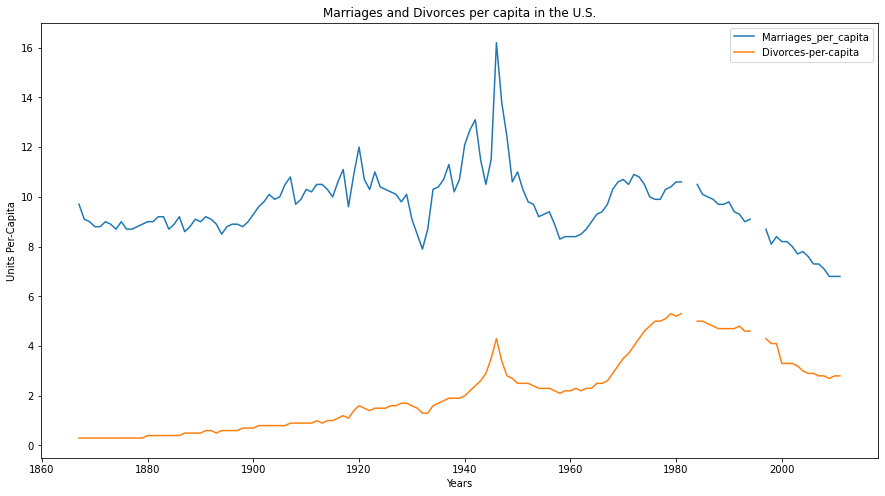

In [101]:
# visual size
plt.rcParams["figure.figsize"] = (15,8)

# plot the lines
plt.plot(years,marriages, label='Marriages_per_capita')
plt.plot(years,divorces, label='Divorces-per-capita')

# setting lables
plt.xlabel("Years")
plt.ylabel("Units Per-Capita")
plt.title("Marriages and Divorces per capita in the U.S.")

#plot legend on chart
plt.legend()

#show plot
plt.show()

## Question 7

#### a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000

In [102]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
#read data
marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

In [104]:
# filter the data for only required years of data
marriage_data_filtered = marriage_data[(marriage_data['Year'] == 1900) |(marriage_data['Year'] == 1950)|(marriage_data['Year'] == 2000)]

In [105]:
# definig variables for values to be used for plotting chart
years = marriage_data_filtered['Year'].values.astype(str)
marriages = marriage_data_filtered['Marriages_per_1000'].values
divorces = marriage_data_filtered['Divorces_per_1000'].values

In [106]:
#select only required columns after setting index to year
marriage_data_filtered = marriage_data_filtered.set_index('Year')[['Marriages_per_1000', 'Divorces_per_1000']]

#renaming columns
marriage_data_filtered.columns = ['Marriages_per_capita', 'Divorces_per_capita']

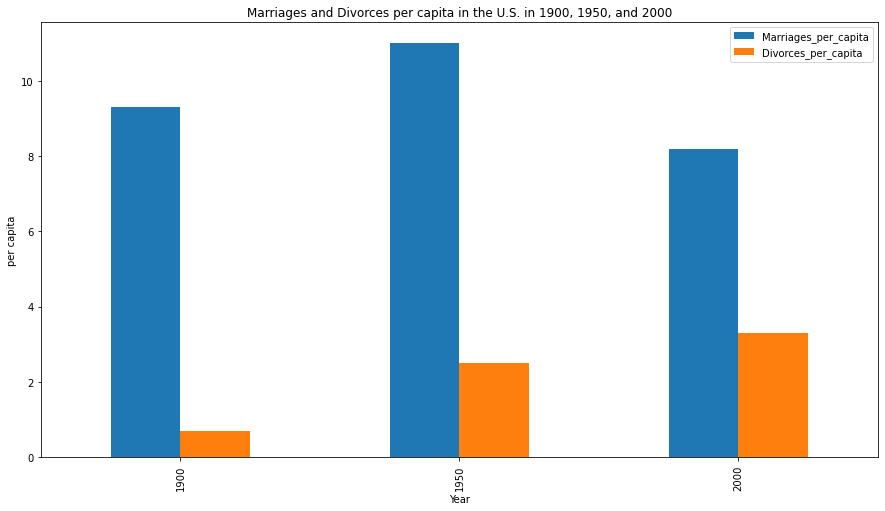

In [107]:
#setting plot size
marriage_data_filtered.plot(kind="bar",figsize=(15, 8))


#setting title and lables of the the axis for the plot
plt.title("Marriages and Divorces per capita in the U.S. in 1900, 1950, and 2000")

plt.xlabel("Year")

plt.ylabel("per capita")

#make the plot visible
plt.show()

## Question 8

#### a horizontal bar chart that compares the deadliest actors in Hollywood

In [108]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
#read data
actor_kills=pd.read_csv('actor_kill_counts.csv')

In [110]:
#set actor column as index
actor_kills = actor_kills.set_index('Actor')

In [111]:
#sorting the values in descending order
actor_kills.sort_values('Count',ascending=False,inplace=True)


#renaming the column
actor_kills.columns = ['Kills']

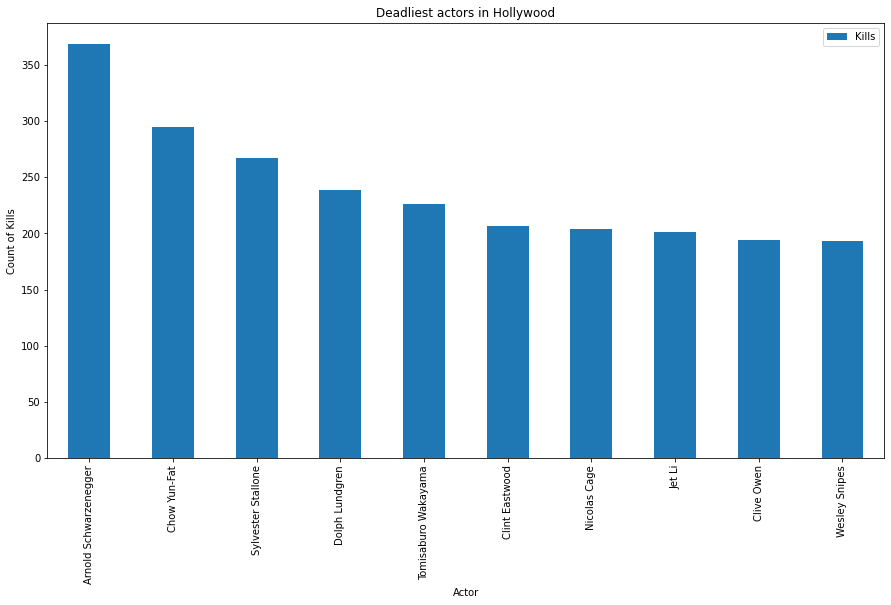

In [112]:
#setting plot size

actor_kills.plot(kind="bar",figsize=(15, 8))


#setting title and lables of the the axis for the plot

plt.title("Deadliest actors in Hollywood")

plt.xlabel("Actor")

plt.ylabel("Count of Kills")

#making plot visible
plt.show()

## Question 9

#### a pie chart showing the fraction of all Roman Emperors that were assassinated

In [113]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
#reading data
roman_emperors = pd.read_csv('roman-emperor-reigns.csv')

In [115]:
#setting dfx variable to the required format for pie chart
#considering only the Cause_of_Death column and counting the values
dfx = pd.DataFrame(roman_emperors[['Cause_of_Death']].value_counts(),columns=['Count'])

In [116]:
#creating a function to change the format of the labels of all the wedges in the pie
def my_format(x):
    return '{:.1f}% ({:.0f})'.format(x, x)
#reference: https://stackoverflow.com/questions/59644751/matplotlib-pie-chart-show-both-value-and-percentage

In [117]:
#taking all the values in the columns to a list
y = dfx.reset_index()['Cause_of_Death'].to_list()
x = dfx.reset_index()['Count'].to_list()

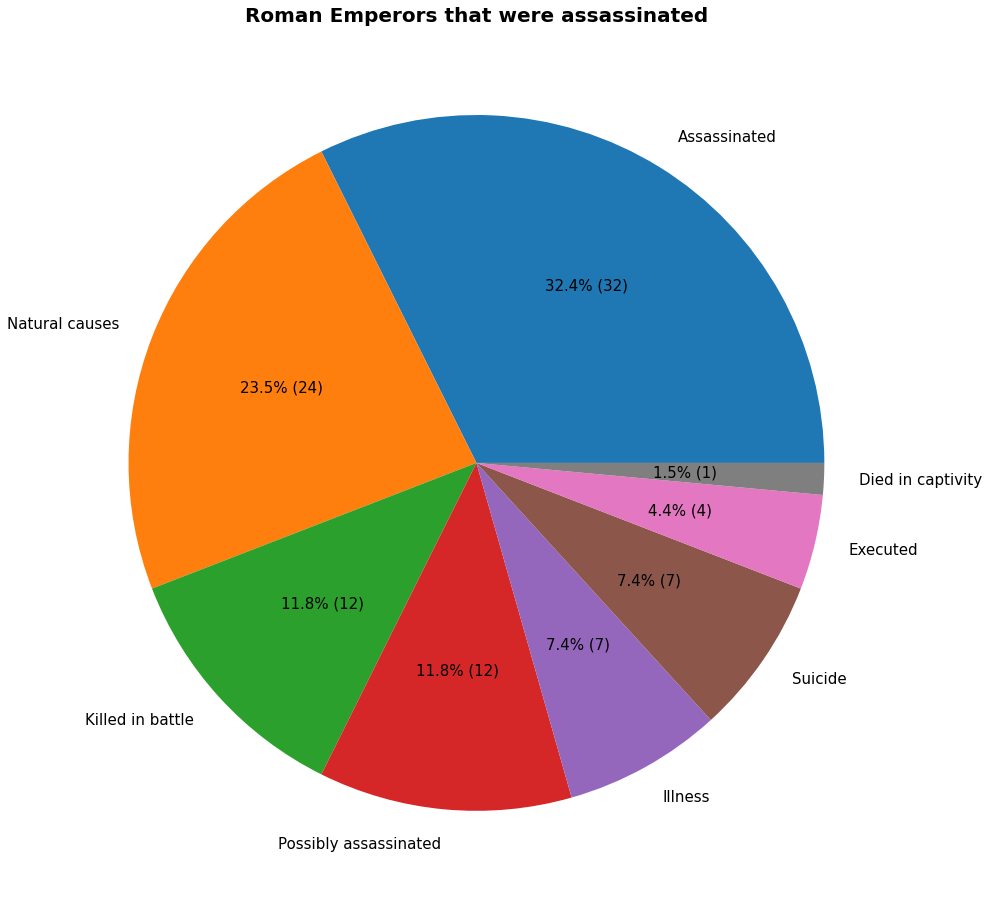

In [118]:
# Figure Size
plt.figure(figsize=(16,16))

# Plot
plt.pie(x, labels=y,autopct=my_format,textprops={"fontsize":15})

# Add title
plt.title('Roman Emperors that were assassinated',fontweight='bold',fontdict={'fontsize': 20})

# Display
plt.show()

## Question 10

#### a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009

In [119]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
#reading data
dfa=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

In [121]:
#creating groups of data by every year. this is because we can plot the data easily by having different color for each year 
groups = dfa.groupby(['Year'])

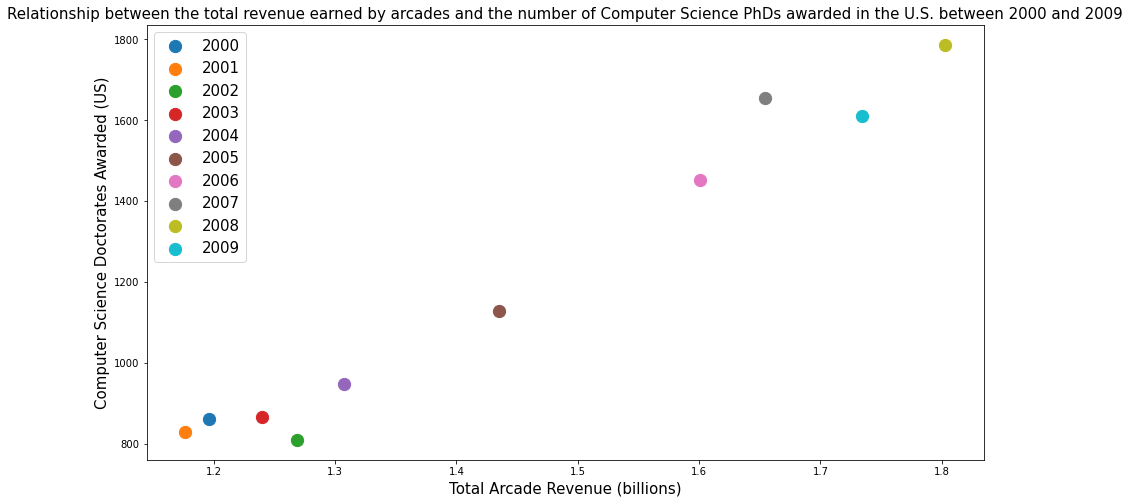

In [122]:
#plotting the dots on the scatter plot for each group
for year, group in groups:
    plt.scatter(group['Total Arcade Revenue (billions)'], group['Computer Science Doctorates Awarded (US)'], label=year,s=150)

#create legend
plt.legend(fontsize=15)

# Title

plt.title('Relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009',fontsize=15,fontweight=50)

# Labels

plt.xlabel('Total Arcade Revenue (billions)',fontsize=15,fontweight=50)
plt.ylabel('Computer Science Doctorates Awarded (US)',fontsize=15,fontweight=50)


# Display the graph

plt.show()